# Task 1:  Prediction using Supervised Machine Learning 

## Author: Nidhi Lohani

This is a regression task. We need to predict percentage of students based on the number of study hours. There are just two independent variables. Linear regression is basically given by equation - y=mx+c. Using this, we find best fit line which help to predict dependent variable.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#To display maximum columns of dataframe
pd.pandas.set_option('display.max_columns',None)

## Reading data from url link

In [4]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported")

Data imported


In [5]:
print(data.shape)

(25, 2)


In [9]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analysis of data using pandas_visual_analysis

In [10]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(data)

## plotting distribution

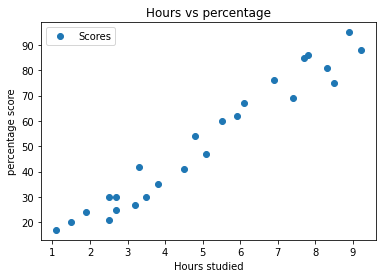

In [11]:
data.plot(x='Hours',y='Scores', style='o')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.title('Hours vs percentage')
plt.show()

There is linear relation between independent and dependent variable.

## Data preparation

In [12]:
#dividing data into inputs (independent variables) and labels (dependent variable)
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## splitting data into test and training set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## training the model

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## plotting regression line

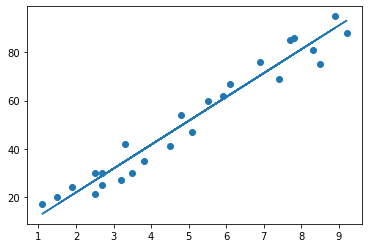

In [15]:
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## predicting unknown new values from test data

In [16]:
pred=regressor.predict(X_test)

## comparing actual and predicted values

In [25]:
df=pd.DataFrame({'Actual':y_test,'predicted':pred})
df

,Actual,predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


## Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(pred,y_test)
score

21.4

In [29]:
##now we have to predict score if a student studies for 9.25 hours/day
hours=[[9.25]]
prediction=regressor.predict(hours)
print("predicted score:{}".format(prediction[0]))

predicted score:93.69173248737538
